In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
# Load your dataset
data = pd.read_csv('Trial_df_for_models')

# Define selected features and target variable
selected_features = ['Corrected Tpr', 'Corrected Ppr',]

target_variable = 'z'

# Extract the selected features and target variable
X = data[selected_features]
y = data[target_variable]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize and scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Determine the number of input features
num_input_features = X_train.shape[1]

# Define a range of hidden layer sizes to iterate over
max_hidden_layers = len(selected_features)  # Use the length of input features
mae_scores_train = []  # To store MAE for training data
mae_scores_test = []   # To store MAE for test data

for num_hidden_layers in range(1, max_hidden_layers + 1):
    # Create a tuple to specify the number of hidden layers with the same number of neurons in each layer
    hidden_layers = tuple([num_input_features] * num_hidden_layers)

    # Define the Feedforward Neural Network (FFNN) model with the specified number of hidden layers
    model = MLPRegressor(hidden_layer_sizes=hidden_layers, activation='tanh', solver='adam', alpha=0.0001,
                         learning_rate='constant', batch_size=32, max_iter=1000, early_stopping=True, random_state=42)

    # Fit the model to the training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the training set
    y_pred_train = model.predict(X_train_scaled)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_scores_train.append(mae_train)

    # Make predictions on the test set
    y_pred_test = model.predict(X_test_scaled)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mae_scores_test.append(mae_test)

    # Print MAE for train and test data with corresponding number of hidden layers for each iteration
    print(f"Train MAE for {num_hidden_layers} hidden layer(s): {mae_train}")
    print(f"Test MAE for {num_hidden_layers} hidden layer(s): {mae_test}")

# Find the index (number of hidden layers) with the lowest MAE for training data
optimal_hidden_layers = np.argmin(mae_scores_train) + 1  # Adding 1 to match the number of hidden layers
optimal_mae_train = mae_scores_train[optimal_hidden_layers - 1]

# Justify the choice of the optimal number of hidden layers based on training data
print(f"\nThe optimal number of hidden layers based on MAE for training data is: {optimal_hidden_layers}")
print(f"The corresponding MAE for the optimal number of hidden layers (training data) is: {optimal_mae_train}")


Train MAE for 1 hidden layer(s): 0.013573951259170589
Test MAE for 1 hidden layer(s): 0.015061007977988735
Train MAE for 2 hidden layer(s): 0.030031277335020045
Test MAE for 2 hidden layer(s): 0.03288693302782895

The optimal number of hidden layers based on MAE for training data is: 1
The corresponding MAE for the optimal number of hidden layers (training data) is: 0.013573951259170589


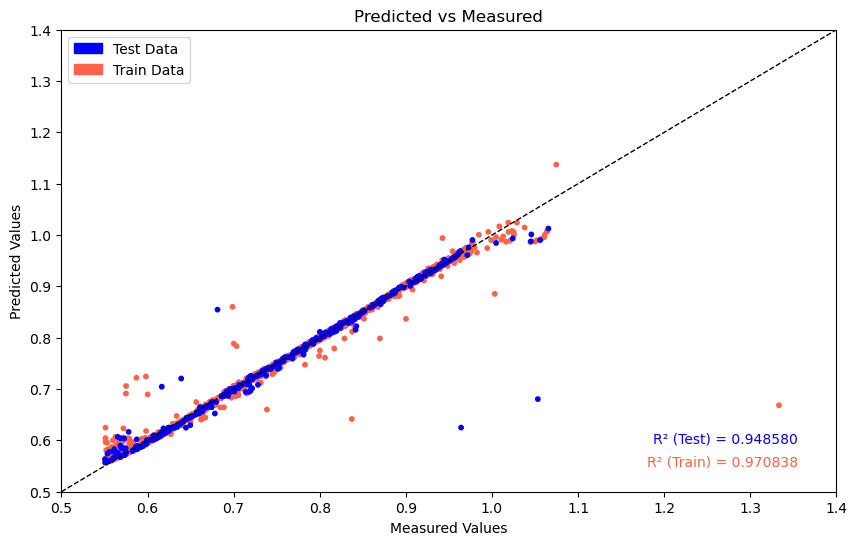

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.patches as mpatches

# Load your dataset
data = pd.read_csv('df_for_models.csv')

# Define selected features and target variable
selected_features = ['Corrected Tpr', 'Corrected Ppr']
target_variable = 'z'

# Extract the selected features and target variable
X = data[selected_features]
y = data[target_variable]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize and scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Neural Network model
model = MLPRegressor(
    hidden_layer_sizes=(100, 100, 100),  # Increase the number of neurons in hidden layers
    activation='relu',  # Change activation function to 'relu'
    solver='adam',
    alpha=0.0001,
    learning_rate='adaptive',  # Change learning rate to adaptive
    batch_size=32,
    max_iter=1000,
    early_stopping=True,
    random_state=42
)

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test set and training set
y_pred_test = model.predict(X_test_scaled)
y_pred_train = model.predict(X_train_scaled)

# Calculate R-squared for evaluation
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

# Plotting (unchanged)
fig, ax = plt.subplots(figsize=(10, 6))

# set the limits of x-axis and y-axis from 0.5 to 1.5
ax.set_xlim(0.5, 1.4)
ax.set_ylim(0.5, 1.4)

predicted_colors_test = ['blue' if pred >= actual else 'blue' for pred, actual in zip(y_pred_test, y_test)]
predicted_colors_train = ['tomato' if pred >= actual else 'tomato' for pred, actual in zip(y_pred_train, y_train)]

pred_actual_scatter_train = ax.scatter(y_train, y_pred_train, c=predicted_colors_train, marker=".", s=40, label='Train Data')
pred_actual_scatter_test = ax.scatter(y_test, y_pred_test, c=predicted_colors_test, marker=".", s=40, label='Test Data')
ax.plot([0.5, 1.4], [0.5, 1.4], color='black', linestyle='--', lw=1)

predicted_patch = mpatches.Patch(color='blue', label='Test Data')
predicted_train_patch = mpatches.Patch(color='tomato', label='Train Data')
handles = [predicted_patch, predicted_train_patch]
plt.legend(handles=handles)

ax.text(0.95, 0.05, f'R\u00b2 (Train) = {r2_train:.6f}', transform=ax.transAxes, fontsize=10, color='tomato', ha='right', va='bottom')
ax.text(0.95, 0.1, f'R\u00b2 (Test) = {r2_test:.6f}', transform=ax.transAxes, fontsize=10, color='blue', ha='right', va='bottom')

ax.set_title('Predicted vs Measured')
ax.set_xlabel('Measured Values')
ax.set_ylabel('Predicted Values')

plt.show()


In [3]:
# Create DataFrame for training data
train_results = pd.DataFrame({
    'Data Type': 'Train',
    'Actual z': y_train,
    'Predicted z': y_pred_train
})

# Create DataFrame for testing data
test_results = pd.DataFrame({
    'Data Type': 'Test',
    'Actual z': y_test,
    'Predicted z': y_pred_test
})

# Concatenate the training and testing data
model_results = pd.concat([train_results, test_results], ignore_index=True)

# Export the DataFrame to an Excel file
model_results.to_excel("FFNN Corrected Pseudo data results.xlsx", index=False)


In [3]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics for the training set
mae_train = mean_absolute_error(y_train, y_pred_train)
mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)

# Calculate evaluation metrics for the test set
mae_test = mean_absolute_error(y_test, y_pred_test)
mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

# Print evaluation metrics for both training and test sets
print("Evaluation Metrics for Training Set:")
print(f"MAE: {mae_train:.9f}")
print(f"MAPE: {mape_train:.9f}")
print(f"RMSE: {rmse_train:.9f}")
print(f"R-squared (R2): {r2_train:.9f}")
print("\nEvaluation Metrics for Test Set:")
print(f"MAE: {mae_test:.9f}")
print(f"MAPE: {mape_test:.9f}")
print(f"RMSE: {rmse_test:.9f}")
print(f"R-squared (R2): {r2_test:.9f}")


Evaluation Metrics for Training Set:
MAE: 0.005693358
MAPE: 0.775492032
RMSE: 0.021405311
R-squared (R2): 0.970837606

Evaluation Metrics for Test Set:
MAE: 0.007295342
MAPE: 0.955715973
RMSE: 0.028537101
R-squared (R2): 0.948580448


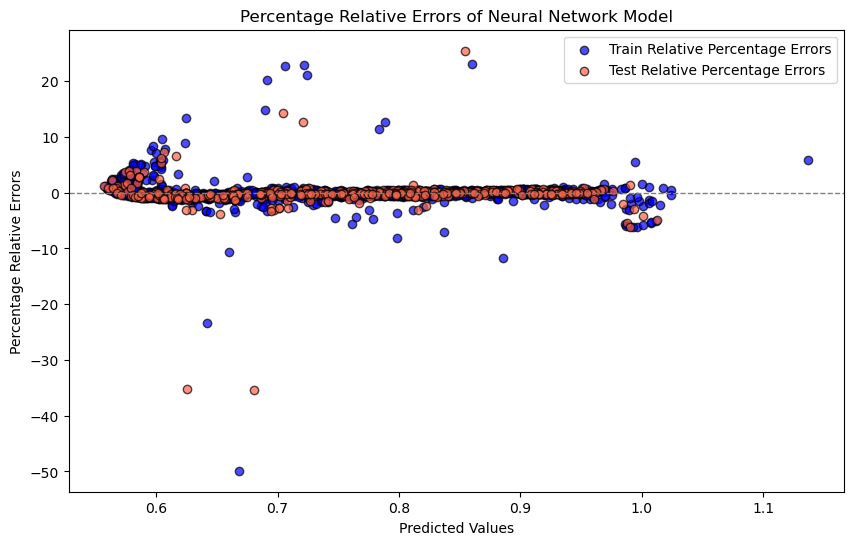

In [4]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Calculate residuals for the training data 
residuals_train_nn = ((y_pred_train - y_train) / y_train) * 100

# Make predictions on the testing set
y_pred_test_nn = y_pred_test

# Calculate residuals for the testing data
residuals_test_nn = ((y_pred_test_nn - y_test) / y_test) * 100

# Separate residuals into overprediction and underprediction categories for the training data
over_prediction_train_nn = y_pred_train[residuals_train_nn > 0]
under_prediction_train_nn = y_pred_train[residuals_train_nn <= 0]

# Separate residuals into overprediction and underprediction categories for the testing data
over_prediction_test_nn = y_pred_test_nn[residuals_test_nn > 0]
under_prediction_test_nn = y_pred_test_nn[residuals_test_nn <= 0]

# Plotting residuals for both training and testing data
plt.figure(figsize=(10, 6))

# Plotting overpredictions in green and underpredictions in red for the training data
plt.scatter(over_prediction_train_nn, residuals_train_nn[residuals_train_nn > 0], c='blue', marker='o', edgecolor='black', alpha=0.7, label='Train Relative Percentage Errors')
plt.scatter(under_prediction_train_nn, residuals_train_nn[residuals_train_nn <= 0], c='blue', marker='o', edgecolor='black', alpha=0.7)

# Plotting overpredictions in blue and underpredictions in orange for the testing data
plt.scatter(over_prediction_test_nn, residuals_test_nn[residuals_test_nn > 0], c='tomato', marker='o', edgecolor='black', alpha=0.7, label='Test Relative Percentage Errors')
plt.scatter(under_prediction_test_nn, residuals_test_nn[residuals_test_nn <= 0], c='tomato', marker='o', edgecolor='black', alpha=0.7)

plt.xlabel('Predicted Values')
plt.ylabel('Percentage Relative Errors')
plt.title('Percentage Relative Errors of Neural Network Model')

# Adding a horizontal line at y=0
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)

# Show legends
plt.legend()

# Show the plot
plt.show()


### 